<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/PROJETO_7_PREVISAO_VALOR_IMOVEL_PYCARET_REGRESSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

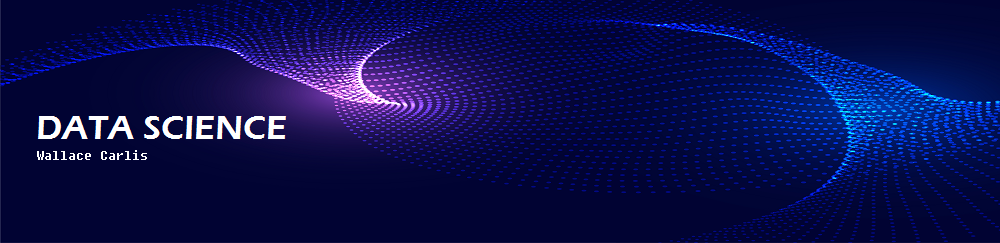

# **Projeto 7 - Previsão de valor dos imóveis - Regressão Linear com Pycaret**

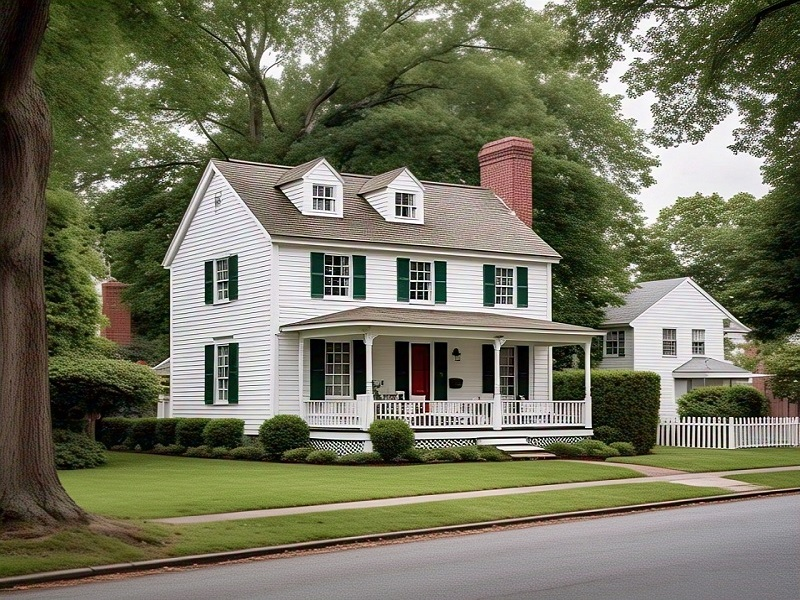

#### Saber o **valor de mercado** mais aproximado o possível dos **imóveis** é um grande trunfo, independente do objetivo, seja para locação, para venda ou para revenda. Pensando nisso, neste projeto, vamos aplicar a técnica de **regressão linear**, que busca justamente **prever um valor**, no caso, o valor correto do imóvel ou o mais próximo disso. Contudo, não utilizaremos as **classes de algoritmos** diretamente da biblioteca **scikit-learn** desta vez, mas eles mesmos pela biblioteca **pycaret** e seu conceito de **auto-ml**, ou, **auto machine learning**. Ela tem como principal objetivo melhorar a velocidade na relação **hipótese/insights**, uma vez que conta com diversos **algoritmos** em seu empacotamento, e seu eficaz método de **pipeline**. Iniciaremos com sua instalação e a rotina normal de **EAD** da base de dados.

In [ ]:
# 1 - Instalando pycaret
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 853.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.6 MB/s eta 0:00:00
   ━━

In [ ]:
# 2 - Importando as bibliotecas
from pycaret.datasets import get_data
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

#### Após a instalação é recomendado **reiniciar** a **sessão** do notebook. Sobre a biblioteca, ela possui diversos **datasets** que podem ser acessados na sua **[página oficial](https://pycaret.gitbook.io/docs)**. Vamos utilizar o dataset de **house** que traz dados sobre **valores** de imóveis.

In [ ]:
# 3 - Acessando e visualizando a base de dados
house = get_data("house")
print(house.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


In [ ]:
# 4 - Verificando o resumo estatístico
house.describe()#[["SalePrice"]]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Uma vez que acessamos a base, podemos verificar a distribuição da coluna alvo, **SalePrice**. Faremos isso tanto com o **histplot** quanto com o **boxplot**.

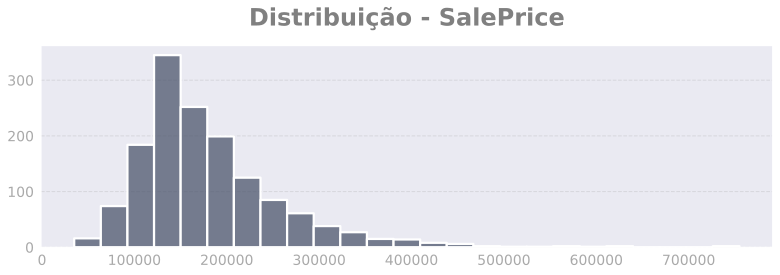

In [ ]:
# 5 - Visualização da distribuição da coluna SalePrice com histplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (11, 4))
bins = 25
ax = sns.histplot(house.SalePrice, lw = 5, bins = bins, color = "#4c556c")
ax.set_title("Distribuição - SalePrice", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

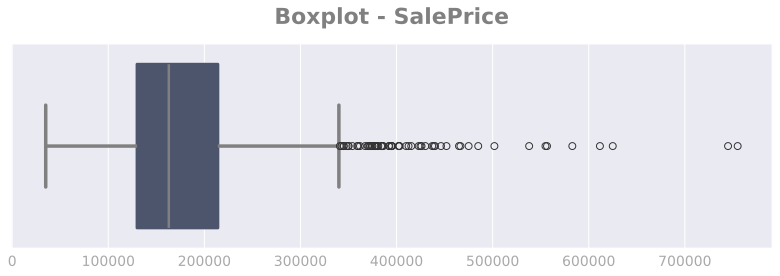

In [ ]:
# 6 - Visualizando o boxplot da coluna SalePrice
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (11, 4))
ax = sns.boxplot(x = house["SalePrice"], orient = "h",
                 linewidth = 3.5, #color = "#4c556c",
                 boxprops = dict(color = "#4c556c", linewidth = 3),
                 medianprops = dict(color = "grey", linewidth = 2.5),
                 whiskerprops = dict(color = "grey"),
                 capprops = dict(color = "grey"))
ax.set_title("Boxplot - SalePrice", fontsize = 22, color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
plt.tight_layout()

#### Conforme observado em ambos os gráficos, a maior quantidade de imóveis se concentra na faixa aproximada entre **100.000 e 200.000** dólares. É possível observar também que os **outliers** começam após a faixa de **300.000**. Com estas informações podemos iniciar as preparações na base de dados para as configurações do **pycaret** para nossa **regressão linear**. Vamos separar nossa base em **treino e teste**, com **10%** dos dados para o **teste**, e em seguida, **20%** da base de **teste** para simular novos dados recebidos à partir do modelo em **produção**.

In [ ]:
# 7 - Separando a base em treino e teste
base_treino = house.sample(frac = 0.90, random_state = 42)
base_teste = house.drop(base_treino.index).reset_index(drop = True)

base_novo_teste = base_teste.sample(frac = 0.20, random_state = 42)
base_teste = base_teste.drop(base_novo_teste.index).reset_index(drop = True)

base_treino.reset_index(drop = True, inplace = True)
base_novo_teste.reset_index(drop = True, inplace = True)

print(f"Tamanho base_treino: {base_treino.shape}")
print(f"Tamanho base_teste: {base_teste.shape}")
print(f"Tamanho base_novo_teste: {base_novo_teste.shape}")


Tamanho base_treino: (1314, 81)
Tamanho base_teste: (117, 81)
Tamanho base_novo_teste: (29, 81)


#### No **pycaret** a função **setup** funciona como um **pipeline** onde é possível configurar os **tratamentos** da variável **alvo**, no nosso caso. Vamos criar um objeto para receber as **configurações padrão** da função.

In [ ]:
# 8 - Criando um objeto para o setup passando a base de treino e a coluna alvo
regressor = setup(data = base_treino,
                  target = "SalePrice")

,Description,Value
0,Session id,2665
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 81)"
4,Transformed data shape,"(1314, 277)"
5,Transformed train set shape,"(919, 277)"
6,Transformed test set shape,"(395, 277)"
7,Numeric features,37
8,Categorical features,43
9,Rows with missing values,100.0%


#### A **comparação dos modelos de algoritmos** talvez seja o principal benefício ao utilizar o **pycaret**. Utilizaremos a função **compare models**, que realiza a comparação aplicando a **validação cruzada** e retorna as principais métricas de regressão linear:

- MAE - **Mean Absolute Error** - Representa a **média do erro absoluto entre os valores reais e os valores previstos**. Quanto **menor o MAE, mais precisas** são as previsões. Ele **não penaliza grandes** erros de forma desproporcional.


- MSE - **Mean Squared Error** - É a **média dos erros quadráticos entre os valores reais e os valores previstos**.**Penaliza erros maiores** mais fortemente devido à elevação ao quadrado. Quanto **menor o MSE, melhor o ajuste** do modelo.


- RMSE - **Root Mean Squared Error** -  É a **raiz quadrada do erro quadrático médio (MSE)**. Está na mesma unidade dos valores originais, facilitando a interpretação em relação ao erro médio.


- R2 - **Coefficient of Determination** - Mede a **proporção da variância explicada pelo modelo em relação à variância total dos dados**. Varia de 0 a 1 (ou negativo em casos de modelos ruins). Um **R2 próximo de 1 indica um ajuste perfeito**.


- RMSLE - **Root Mean Squared Log Error** - É a **raiz do erro quadrático médio do logaritmo dos valores reais e previstos**. **Penaliza erros relativos** e é útil para casos em que há **distribuições assimétricas** ou grandes discrepâncias.


- MAPE - **Mean Absolute Percentage Error** - Representa a **média do erro absoluto em percentual em relação aos valores reais**. Mede o erro em percentual, mas **é sensível a valores próximos de zero** (onde pode explodir).

In [ ]:
# 9 - Comparando modelos de regressão linear
melhor_modelo = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16364.2899,608535981.1705,24387.3594,0.8972,0.1321,0.0964,1.2530
lightgbm,Light Gradient Boosting Machine,16389.0755,633142148.5156,24904.0887,0.8942,0.1339,0.0962,1.2610
llar,Lasso Least Angle Regression,17305.6708,663363267.6334,25406.2810,0.8894,0.1646,0.1058,0.6960
ridge,Ridge Regression,17861.8773,683277872.9532,25864.6342,0.8855,0.1681,0.1100,0.5630
rf,Random Forest Regressor,17536.6205,719034772.4928,26549.4238,0.8805,0.1430,0.1041,2.8150
xgboost,Extreme Gradient Boosting,18262.0406,757510073.3131,27270.5444,0.8738,0.1425,0.1053,1.1900
et,Extra Trees Regressor,17687.8595,763393620.1625,27332.6217,0.8713,0.1445,0.1049,2.7350
en,Elastic Net,18504.3181,778083195.4653,27609.9690,0.8706,0.1715,0.1118,0.8880
omp,Orthogonal Matching Pursuit,19209.1551,783647146.9168,27806.9636,0.8684,0.1721,0.1175,0.5890
lasso,Lasso Regression,19128.1318,793296374.8568,27814.0468,0.8671,0.1828,0.1199,0.8570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# 10 - Verificando o nome dos modelos disponívels
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# 11 - Verificando o melhor modelo para esta base de dados
print(melhor_modelo)

GradientBoostingRegressor(random_state=2665)


#### Uma vez que já sabemos qual é o **melhor modelo**, podemos de fato **criar** o modelo com a função **create model**. Em seguida podemos realizar o **tunning** dos hiperparâmetros bastando informar qual métrica desejada, no nosso caso, utilizaremos a **R2**, e ainda visualizar a **diferença** dos **erros** para o modelo.

In [ ]:
# 12 - Criando o melhor modelo de regressão linear
modelo = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16562.2547,695924659.9461,26380.3840,0.9150,0.1530,0.1039
1,17850.2480,788740745.4026,28084.5286,0.8762,0.1307,0.0946
2,17651.1225,754576032.1435,27469.5474,0.8838,0.1278,0.0945
3,15337.7257,428320430.8073,20695.9037,0.9317,0.1367,0.1016
4,16481.1180,891345921.9086,29855.4170,0.8326,0.1382,0.0926
5,17987.1123,674962569.2265,25980.0417,0.8849,0.1482,0.1110
6,15087.7521,546629252.8844,23380.1038,0.9040,0.1188,0.0874
7,13883.6679,349567924.6636,18696.7357,0.9083,0.1003,0.0767
8,18135.9083,602132736.4531,24538.3931,0.8955,0.1416,0.1088


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# 13 - Realizando o tunning dos hiperparâmetros
modelo_tuned = tune_model(modelo, optimize = "R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17989.5403,867140005.3813,29447.2410,0.8941,0.1551,0.1067
1,15377.2243,662278328.1490,25734.7689,0.8961,0.1061,0.0780
2,15755.8078,578383449.1000,24049.6039,0.9109,0.1216,0.0897
3,16487.2330,519893447.0222,22801.1721,0.9171,0.1452,0.1072
4,18321.0598,1069110008.0555,32697.2477,0.7993,0.1417,0.0971
5,17277.9938,624025153.7748,24980.4955,0.8936,0.1494,0.1103
6,14517.0466,594782925.3866,24388.1718,0.8955,0.1172,0.0834
7,13026.5403,331899551.6276,18218.1105,0.9129,0.1005,0.0740
8,19176.4879,754715580.0172,27472.0873,0.8691,0.1453,0.1119


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


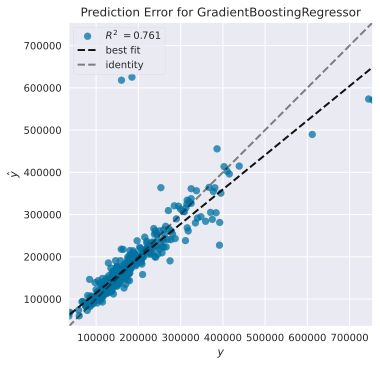

In [ ]:
# 14 - Visualizando os erros do modelo com a função plot_model
plot_model(modelo_tuned,
           plot = "error")

#### Também podemos verificar quais **colunas** são efetivamente **importantes** para o modelo com o parâmetro **feature**. Bem como visualizar o **fluxo** de construção que o **pycaret** aplica.

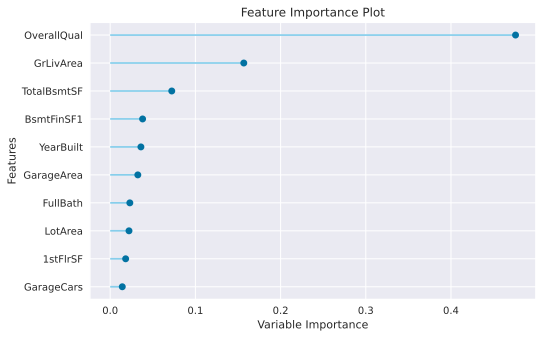

In [ ]:
# 15 - Verificando as colunas mais importantes
plot_model(modelo_tuned, plot = "feature")

In [ ]:
# 16 - Verificando a avaliação do modelo
evaluate_model(modelo_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Vamos utilizar a função **predict_model** para efetivamente realizar a **previsão** do modelo.

In [ ]:
# 17 - Realizando as previsões do modelo
predict_model(modelo_tuned);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,18127.4273,1760403076.8666,41957.1576,0.7606,0.1574,0.1029


#### A média de **R2** do modelo criado foi de **0.8972**. Já o modelo **tunado** com o **R2 otimizado**, obteve apenas **0.8934**, ou seja, as configurações **padrão** do algoritmo são mais que suficientes para a **performance** desta base de dados. Já as previsões foram de **0.7606**. Portanto, de certo modo o resultado foi até **interessante** do ponto de vista desta métrica (**R2**). Podemos **finalizar** o modelo com a função **finalize_model**.

In [ ]:
# 18 - Fit geral na base de dados
modelo_final = finalize_model(modelo_tuned)
modelo_final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'GrLivArea',
                                             'BsmtFullBath', 'BsmtHalfBath',
                                             'FullBath', 'Hal...
                                                                    'RoofMatl',
                                                                    'Exterior1st',
                                                                    'Exterior2nd',
                                                                    'MasVnrType',
                                                                    'ExterQual',
                                                                    'ExterCond',
                                                                    'Foundation',
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                    'BsmtFinType2',
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    'KitchenQual',
                                                                    'Functional',
                                                                    'FireplaceQu', ...],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=2665))])

#### Após o treinamento, podemos realizar as **previsões** do modelo treinado na base de **teste**, que ainda não foi acessada, justamente para evitar o **data leakage**, ou seja, o **vazamento** dos dados.

In [ ]:
# 19 - Previsão na base de teste, ou seja, em dados não vistos
previsoes_sobre_teste = predict_model(modelo_final, data = base_teste)
previsoes_sobre_teste[["SalePrice", "prediction_label"]].head().round()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,13111.6586,437981806.2506,20928.0149,0.9245,0.0919,0.0702


,SalePrice,prediction_label
0,279500,216962.0
1,157000,143157.0
2,325300,324763.0
3,139400,145002.0
4,277500,314614.0


#### Obtivemos o resultado de **0.9245** para a métrica **R2**, extremamente interessante. Os passos seguintes, opcionais, serão:
- **salvar** o modelo treinado;
- **carregar** o modelo treinado para uma nova utilização;
- **realizar novas previsões** à partir do modelo carregado.

In [ ]:
# 20 - Salvando o modelo com a função save_model
save_model(modelo_final,"Modelo_para_Producao")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'RoofMatl',
                                                                     'Exterior1st',
                

In [ ]:
# 21 - Carregando o modelo salvo
modelo_producao_salvo = load_model("Modelo_para_Producao")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# 22 - Realizando novas previsões com o modelo salvo
novas_previsoes = predict_model(modelo_producao_salvo, data = base_novo_teste)
novas_previsoes.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9478.6573,142995752.7597,11958.0832,0.9587,0.0807,0.0617


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
0,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,110000,112303.872518
1,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2010,WD,Normal,116500,124409.380515
2,277,20,RL,129.0,9196,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,201000,210210.485581
3,202,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2008,WD,Normal,171500,154507.575638
4,407,50,RL,51.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2008,WD,Normal,115000,119960.750340


### Concluindo:

#### Conseguir prever o valor de um imóvel com uma **boa porcentagem de acerto** é sem dúvida nenhuma um **grande negócio**, seja para compra, venda ou revenda. E nosso modelo respondeu **positivamente** a este processo, mesmo quando colocado frente a dados ainda não vistos, o que de fato acontece quando o **modelo vai para a produção**. Portanto, **ponto positivo para nós**!

#### - Aos moldes do **scikit-learn**, o **pycaret** consegue com poucas linhas de código e poucas funções realizar as **previsões** para seus modelos de machine learning. O grande trunfo da biblioteca é de fato poder **comparar** diversos algoritmos com suas **configurações padrão** apontando de forma extremamente ágil com o **melhor modelo**. Ponto positivo para uma primeira definição de hipótese sobre qual algoritmo utilizar.

#### - Sobre a base de dados, trata-se de um dataset já conhecido a respeito de **valores de imóveis**. Devido a isso, optou-se por utilizar um algoritmo de **regressão linear**. A respeito das **métricas**, a opção de forma parcial foi pela **R2**, mas simples de ser explicada quanto ao seu resultado, ou seja, quanto mais **perto do valor 1, melhor**.

#### - Vale o experimento tanto com outras **métricas** quanto com outros **algoritmos**, independente da escolha pelo **pycaret** da melhor opção, bem como a utilização de outro **dataset**, para se obter mais familiaridade com esta biblioteca.

#### Muito obrigado pela leitura. Caso tenha interesse em analisar outros projetos fique à vontade acessando diretamente meu [GitHub](https://github.com/wallacecarlis), [Medium](https://wallacecarlis.medium.com/), e meu [Site](https://www.wallacecarlis.com/). Todo feedback será bem-vindo, abs!